In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, date
%matplotlib inline

In [2]:
start_date = date(2018, 1, 1)

In [3]:
df = pd.read_csv('commits.tsv', sep='\t', index_col='SHA')
df['When'] = df['When'].map(datetime.fromisoformat)
df['Date'] = df['When'].map(datetime.date)
df = df[df.Date > start_date]
min_time = df['When'].min()
df['Delta'] = df['When'].map(lambda x: (x - min_time).days)
df = df.sort_values('Delta')
df.head()

,Category,Repository,When,Name,Date,Delta
SHA,,,,,,
44e24bcc,bel,pybel,2018-01-02 11:02:27+01:00,Charles Tapley Hoyt,2018-01-02,0
522174ee,bel,pybel-tools,2018-01-02 17:00:30+01:00,Charles Tapley Hoyt,2018-01-02,0
7a732280,bel,pybel-tools,2018-01-02 17:07:59+01:00,Charles Tapley Hoyt,2018-01-02,0
51643e5d,bel,pybel,2018-01-02 11:50:17+01:00,Charles Tapley Hoyt,2018-01-02,0
717a3032,bel,pybel-tools,2018-01-02 21:53:37+01:00,Charles Tapley Hoyt,2018-01-02,0


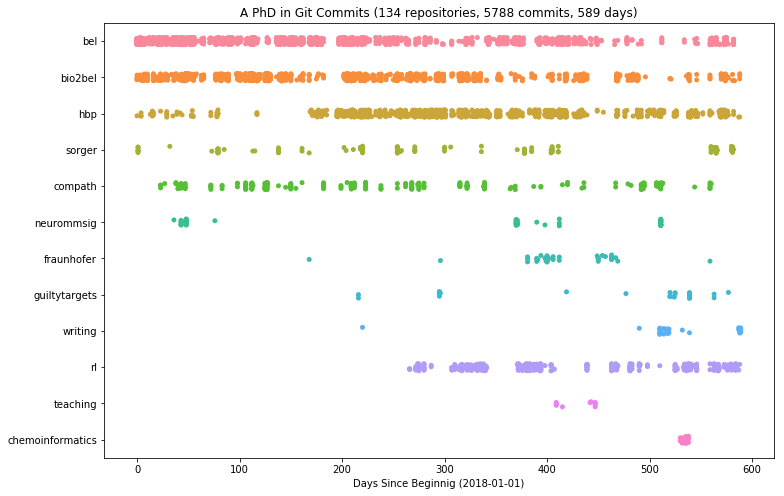

In [4]:
fix, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.stripplot(x='Delta', y='Category', data=df, jitter=True)
plt.title(f'A PhD in Git Commits ({df.Repository.nunique()} repositories, {len(df)} commits, {df.Delta.max()} days)')
plt.xlabel(f'Days Since Beginning ({start_date})')
plt.ylabel('')
plt.savefig('commits.png')
plt.show()